<a href="https://colab.research.google.com/github/kellemes13/Tool/blob/main/Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

latency_scale=5

# clean error data before plot bw
def plot_bw_clean_data(title, file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Process data
    raw_y = [int(line.split(',')[1])/1000*latency_scale for line in data]  # 直接计算y值

    mean_y = np.mean(raw_y)
    std_y = np.std(raw_y)


    print(mean_y)

    skip=0
    cnt=1
    x=[]
    y=[]
    for i in range(len(raw_y)):
      if skip==1:
        skip=0
        continue
      if raw_y[i] <= mean_y - 2*std_y and i <(len(raw_y)-2):
        if raw_y[i+1]>=mean_y - 2*std_y:
          skip=1
          continue
      y.append(raw_y[i])
      x.append(cnt)
      cnt=cnt+1

    # Plot the graph
    plt.plot(x, y, 'b')
    plt.grid(True)
    plt.ylim([mean_y-(10*std_y),mean_y+(10*std_y)])
    plt.xlabel('time(sec)')
    plt.ylabel('MB/s')
    plt.title('Bandwidth: ' + title)
    plt.show()




# Define a function to read data from a file and plot a graph
def plot_bw(title, file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.readlines()


    # Process data
    x = []
    y = []
    i=1
    for line in data:
        values = line.split(',')
        y.append(int(values[1])/1000*latency_scale)
        x.append(i)
        i=i+1


    # Plot the graph
    plt.plot(x, y,'b')
    plt.grid(True)
    plt.xlabel('time(sec)')
    plt.ylabel('MB/s')
    plt.title('Bandwidth: ' + title)
    plt.show()


    # Define a function to read data from a file and plot a graph
def plot_iops(title,file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.readlines()


    # Process data
    x = []
    y = []
    i=1
    for line in data:
        values = line.split(',')
        y.append(int(values[1])*latency_scale)
        x.append(i)
        i=i+1

    y_kiops = [element / 1000 for element in y]


    # Plot the graph
    plt.plot(x, y_kiops, 'b')
    plt.grid(True)
    plt.xlabel('time(sec)')
    plt.ylabel('IO')
    plt.title('KIOPS: '+title)
    plt.show()


# Define a function to read data from a file and plot a graph
def plot_clat(title, file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.readlines()


    # define a figure
    plt.figure()

    # Process data
    x = []
    y = []

    for line in data:
        values = line.split(',')
        y.append(int(values[1])/1000/latency_scale)
        x.append(len(y))

    y_slot = sorted(y)
    x_percentage = [element / len(x)*100 for element in x]

    # plot graph
    s_pt99 = list(map(lambda k: k >= 99, x_percentage)).index(True)
    s_pt999 = list(map(lambda k: k >= 99.9, x_percentage)).index(True)
    s_pt9999 = list(map(lambda k: k >= 99.99, x_percentage)).index(True)

    l = len(x_percentage)
    x_spt = int(l*0.25)
    x_0_99 = np.linspace(0, x_spt, s_pt99)
    x_99_999 = np.linspace(x_spt+1, x_spt*2, s_pt999-s_pt99)
    x_999_9999 = np.linspace(x_spt*2+1, x_spt*3, s_pt9999-s_pt999)
    x_9999_end = np.linspace(x_spt*3+1, l-1, l-s_pt9999)

    y_0_99 = y_slot[:s_pt99]
    y_99_999 = y_slot[s_pt99:s_pt999]
    y_999_9999 = y_slot[s_pt999:s_pt9999]
    y_9999_end = y_slot[s_pt9999:]

    #plot line
    plt.plot(x_0_99, y_0_99, 'b')
    plt.plot(x_99_999, y_99_999, 'b')
    plt.plot(x_999_9999, y_999_9999, 'b')
    plt.plot(x_9999_end, y_9999_end, 'b')
    #smooth line
    plt.plot([x_0_99[-1], x_99_999[0]], [y_0_99[-1], y_99_999[0]], 'b')
    plt.plot([x_99_999[-1], x_999_9999[0]], [y_99_999[-1], y_999_9999[0]], 'b')
    plt.plot([x_999_9999[-1], x_9999_end[0]], [y_999_9999[-1], y_9999_end[0]], 'b')
    #mark pointview
    plt.plot(x_99_999[0],y_99_999[0],'ro')
    plt.plot(x_999_9999[0],y_999_9999[0],'ro')
    plt.plot(x_9999_end[0],y_9999_end[0],'ro')
    #mark number
    x_loc=1.06
    y_loc=0.95
    plt.text(x_99_999[0]*x_loc, y_99_999[0]*y_loc,'{}us'.format(round(y_99_999[0], 2)), weight='bold')
    plt.text(x_999_9999[0]*x_loc, y_999_9999[0]*y_loc,'{}us'.format(round(y_999_9999[0], 2)), weight='bold')
    plt.text(x_9999_end[0]*x_loc, y_9999_end[0]*y_loc,'{}us'.format(round(y_9999_end[0], 2)), weight='bold')

    plt.xticks([0, x_spt, x_spt*2, x_spt*3, l-1], [0, 99, 99.9, 99.99, 100])
    plt.grid(True)
    plt.xlabel("QoS (%)")
    plt.ylabel('us')
    plt.title('Sorted Latency: '+ title)
    plt.show()


# Define a function to read data from a file and plot a graph
def plot_clat_by_time(title, file_path):
    # Read data from file
    with open(file_path, 'r') as file:
        data = file.readlines()


    # Process data
    x = []
    y = []


    for line in data:
        values = line.split(',')
        y.append(int(values[1])/1000/latency_scale)
        x.append(len(y))


    plt.plot(x, y,'b')
    plt.grid(True)
    plt.xlabel("Cmd Sequence")
    plt.ylabel('us')
    plt.title('Latency: '+ title)
    plt.show()




# sequential write
#plot_bw('sw','/content/sw_bw.1.log')
#plot_bw_clean_data('sw','/content/sw_bw.1.log')

# random write
plot_iops('rw','/content/rw_iops.1.log')
plot_clat('rw','/content/rw_clat.1.log')
plot_clat_by_time('rw','/content/rw_clat.1.log')

# sequential read
#plot_bw('sr','/content/sr_bw.1.log')
#plot_bw_clean_data('sr','/content/sr_bw.1.log')

# random read
#plot_iops('rr','/content/rr_iops.1.log')
#plot_clat('rr','/content/rr_clat.1.log')
#plot_clat_by_time('rr','/content/rr_clat.1.log')

畫hook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设CSV文件的路径，你需要将这个路径替换为你CSV文件的实际路径。
csv_file_path = 'test.csv'  # 替换为你的CSV文件路径

# 读取CSV文件
df = pd.read_csv(csv_file_path, sep='\t', header=None, names=['QD', 'Value1', 'Value2', 'Value3'])

# 解析'QD'列以便作为X轴数据
x_labels = df['QD'].tolist()

# 获取Y轴的数据
y1 = df['Value1'].tolist()
y2 = df['Value2'].tolist()
y3 = df['Value3'].tolist()

# 绘制图表
plt.figure(figsize=(10, 6))

plt.plot(x_labels, y1, label='Average', marker='o')
plt.plot(x_labels, y2, label='99%', marker='o')
plt.plot(x_labels, y3, label='99.99%', marker='o')

plt.xlabel('Queue Depth (QD)')
plt.ylabel('Latency')
plt.title('Size:4KB')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


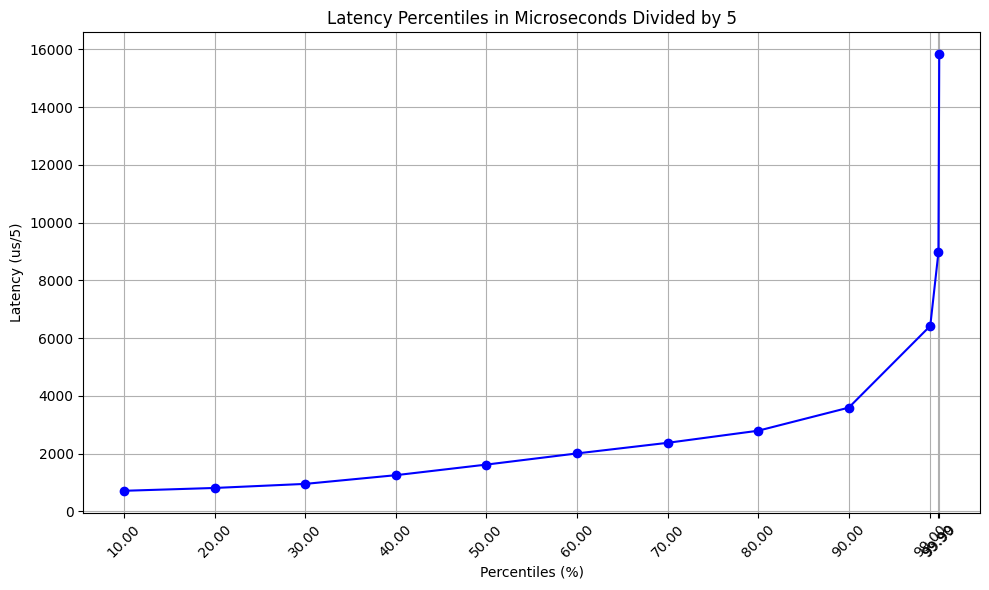

In [4]:
import matplotlib.pyplot as plt
import re

latency_scale=5

# Function to parse the log content and extract the percentiles and values.
def parse_log_content(log_content):
    pattern = r'(\d+\.\d+?)th=\[\s*(\d+)\]'
    matches = re.findall(pattern, log_content)
    percentiles = [float(match[0]) for match in matches]
    values = [int(match[1]) for match in matches]
    return percentiles, values

# Function to plot the percentiles and values.
def plot_percentiles(percentiles, values):
    # Divide the values by 5 as per the requirement
    adjusted_values = [value / latency_scale for value in values]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(percentiles, adjusted_values, '-o', color='blue')
    plt.xlabel('Percentiles (%)')
    plt.ylabel('Latency (us)')
    plt.title('Latency Percentiles ')
    plt.grid(True)
    plt.xticks(percentiles, rotation=45)
    plt.tight_layout()
    plt.show()

# Read the log file
log_file_path = 'rw-sumary.log'  # Replace with your actual log file path
with open(log_file_path, 'r') as file:
    log_content = file.read()

# Parse the log content
percentiles, values = parse_log_content(log_content)

# Plot the graph
plot_percentiles(percentiles, values)
